<b> Aerofit sells 3 types of treadmills belonging to 3 tiers: <br>
    
Entry-level - <b>KP281<b> - $1,500

Mid-level - <b>KP481<b> - $1,750

Advanced - <b>KP781<b> - $2,500

<b> The purpose of this research is to help Aerofit identify the target audience for each type of treadmill offered by the company in order to better understand what type of treadmill would a new user prefer.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import mode

In [2]:
#reading the dataset from the given URL
df = pd. read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')


In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## 1.<u>Preliminary Analysis

In [4]:
#getting basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<b> <i> Initial info shows no null values

In [5]:
#generating descriptive statistics
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<i><b>Dataset shows the following:<b><br>
    
Average age of consumers : 26yrs<br>
Average education of consumers : 16yrs<br>
Average usage of the treadmill per week : 3 times, 94 miles<br>
Average annual income of consumers : $50500 <br>

 ## 2.<u>Outlier Detection and Removal

<h3>'Income' attribute

In [6]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

<AxesSubplot:ylabel='Income'>

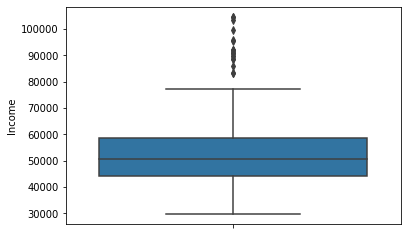

In [7]:
sns.boxplot(y = 'Income', data = df)

In [8]:
df['Income'].mean() - df['Income'].median()

3123.0777777777766

<b>most salary data is between 44k and 58k, but we notice big difference between mean and median due to some existing outliers

In [9]:
#removing the outliers
q1 = df['Income'].quantile(.25)
q3 = df['Income'].quantile(.75)
iqr = q3-q1
df = df[(df['Income'] > q1-1.5*iqr) & (df['Income'] < q3+1.5*iqr)]

<AxesSubplot:ylabel='Income'>

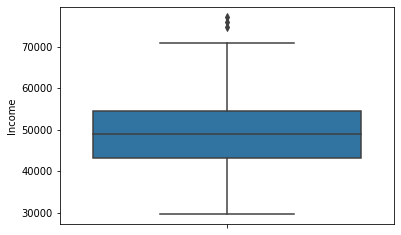

In [10]:
sns.boxplot(y = 'Income', data = df)

In [11]:
df['Income'].mean() - df['Income'].median()

228.18012422360334

<b>outliers significantly reduced

### Categorizing attributes

 <b> Categorizing AGE to a new column 'age_bins'

In [12]:
df['age_bins'] = pd.cut(x=df['Age'], bins=[0,20,30,40,50,70,100], labels = ['0-20','20-30','30-40','40-50','50-70','70-100'])

In [13]:
df['age_bins'].value_counts()

20-30     101
30-40      42
0-20       10
40-50       8
50-70       0
70-100      0
Name: age_bins, dtype: int64

 <b> Categorizing INCOME to a new column 'income_bins'

In [14]:
df['income_bins'] = pd.cut(x=df['Income'], bins=[29000,40000,50000,60000,70000,80000], labels = ['29k-40k','40k-50k','50k-60k','60k-70k','70k-80k'])

In [15]:
df['income_bins'].value_counts()

50k-60k    55
40k-50k    51
29k-40k    32
60k-70k    19
70k-80k     4
Name: income_bins, dtype: int64

 ## 3.<u>Detailed Analysis

<b> Checing correlation

<AxesSubplot:>

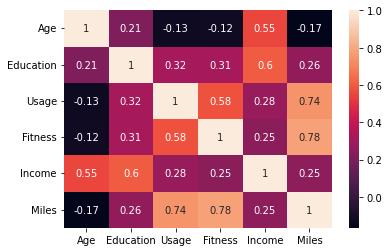

In [16]:
sns.heatmap(df.corr(), annot = True)

> Usage, Miles and Fitness see an obvious correlation. <br>
<b>Education, Age and Income</b> seems to have a high correlation between each other which can be further explored..<br>


<b>First checking how can <i>'Gender'</i> <b>affect

<AxesSubplot:xlabel='Gender', ylabel='Income'>

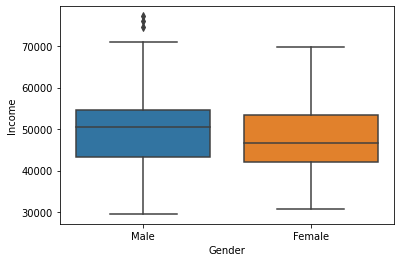

In [17]:
sns.boxplot(x = 'Gender', y = 'Income', data = df)

In [19]:
df.groupby('Gender')['Income'].mean()

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

> Males earn more than females, so would most likely spend more

<AxesSubplot:xlabel='Gender', ylabel='Age'>

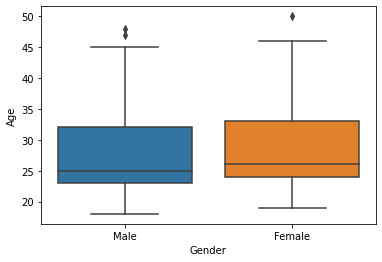

In [20]:
sns.boxplot(x = 'Gender', y = 'Age', data = df)

In [22]:
df.groupby('Gender')['Age'].mean()

Gender
Female    28.493151
Male      27.875000
Name: Age, dtype: float64

>Males tend to purchase the equipment at a younger age while females tend to buy it at an older age. <br>
This could indicate that when compared to males, females get more health concious as they age

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

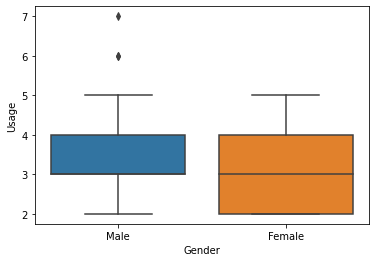

In [23]:
sns.boxplot(x = 'Gender', y = 'Usage', data = df)

In [24]:
df.groupby('Gender')['Usage'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,73.0,3.095890,0.915369,2.0,2.0,3.0,4.0,5.0
Male,88.0,3.420455,0.955584,2.0,3.0,3.0,4.0,7.0


<AxesSubplot:xlabel='Gender', ylabel='Miles'>

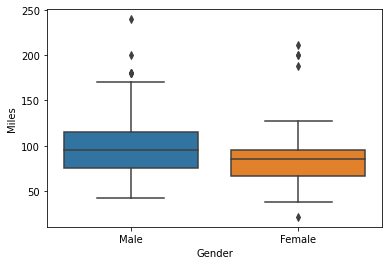

In [25]:
sns.boxplot(x = 'Gender', y = 'Miles', data = df)

In [26]:
df.groupby('Gender')['Miles'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,73.0,84.671233,35.753809,21.0,66.0,85.0,95.00,212.0
Male,88.0,100.386364,40.755913,42.0,75.0,95.0,114.75,240.0


>Males use the treadmill much frequently and run more miles than females

<AxesSubplot:xlabel='Product', ylabel='count'>

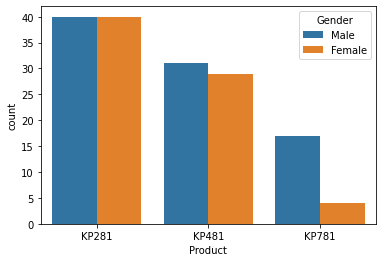

In [27]:
sns.countplot(x = 'Product', data = df, hue = 'Gender')

In [28]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      17
         Female     4
Name: Gender, dtype: int64

> Data shows that males give more importance to the quality and features even if it costs more, while females seem not too interested in spending more on the equipment

In [29]:
df.groupby(['Gender','MaritalStatus']).sum()['Miles']

Gender  MaritalStatus
Female  Partnered        3633
        Single           2548
Male    Partnered        4926
        Single           3908
Name: Miles, dtype: int64

> Males and Females with partners seem to be more motivated to purchase the treadmill

<b>Inference:<i> Males earn more, they use the treadmill more while they are relatively young and with a partner, and most of them do not mind paying a premium for extra features and quality.

<b>How can <i>Age and Education</i> <b>affect?

<AxesSubplot:xlabel='Product', ylabel='Age'>

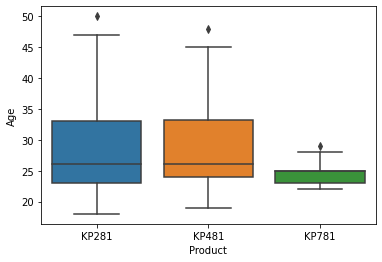

In [30]:
sns.boxplot(x = 'Product', y = 'Age', data = df)

In [31]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    21
Name: Product, dtype: int64

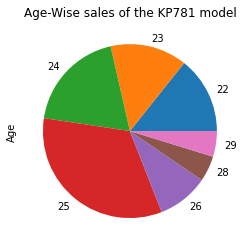

In [32]:
df[df.Product == 'KP781'].groupby('Age').Age.count().plot(kind='pie', title = 'Age-Wise sales of the KP781 model')
plt.show()

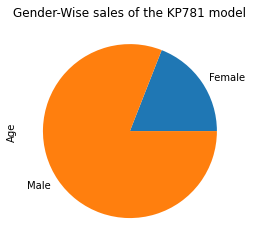

Gender
Female     4
Male      17
Name: Age, dtype: int64


In [33]:
df[df.Product == 'KP781'].groupby('Gender').Age.count().plot(kind='pie', title = 'Gender-Wise sales of the KP781 model')
plt.show()
print(df[df.Product == 'KP781'].groupby('Gender').Age.count())

> <b>The high-end model KP781 is only bought by consumers in their twenties, mostly 25, and mostly males

<AxesSubplot:xlabel='Age', ylabel='Income'>

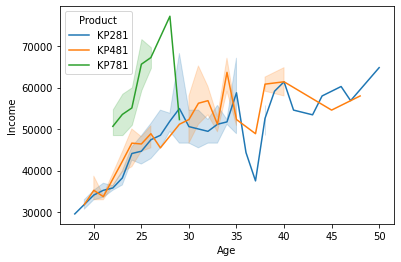

In [34]:
sns.lineplot(x = 'Age', y = 'Income', data = df, hue = 'Product')

>As mentioned before, people between 20 and 30 years of age buy the KP781 model, they are also among the highest earning consumers 

<AxesSubplot:xlabel='Education', ylabel='Income'>

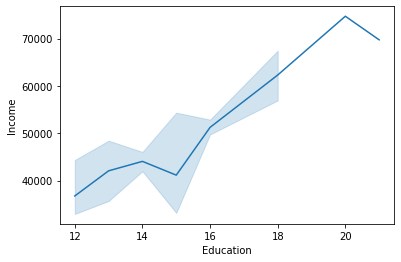

In [35]:
sns.lineplot(x = 'Education', y = 'Income', data = df)

> More years of education, more the income

<AxesSubplot:xlabel='Product', ylabel='Education'>

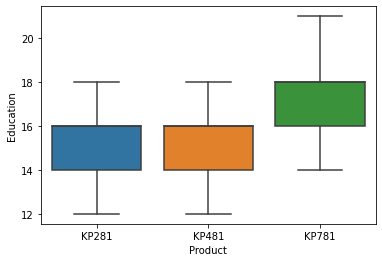

In [36]:
sns.boxplot(x = 'Product', y = 'Education', data = df)

In [37]:
df[df.Product == 'KP781'].groupby('Education').Education.count()

Education
14    1
16    9
18    9
20    1
21    1
Name: Education, dtype: int64

> Consumers who typically have more than 16 years of education tend to purchase the high end model.<br>This could possibly be due to the fact that they earn more. Let's find that out!

<AxesSubplot:xlabel='Usage', ylabel='Education'>

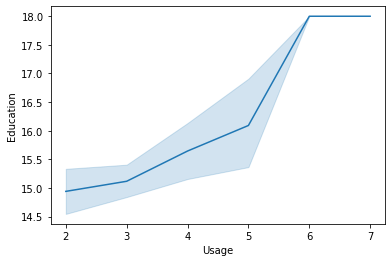

In [38]:
sns.lineplot(x = 'Usage', y = 'Education', data = df)

<AxesSubplot:xlabel='Miles', ylabel='Education'>

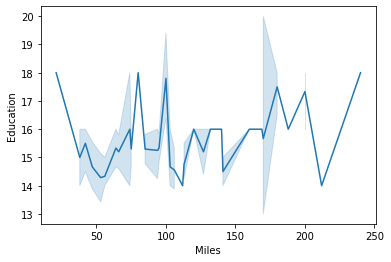

In [39]:
sns.lineplot(x = 'Miles', y = 'Education', data = df)

> We can deduce that consumers with more education tend to use the treadmill more frequently in a week possibly because of being better aware about the benefits of consistent physical activity

<b>Inference:<i> Consumers between the age of 20 and 30 includes the most educated and most frequent treadmill users, and with the highest income they are the only category of consumers who are mostly males that purchases the higher end model 'KP781'

<b>How can <i>Marital Status</i> <b>affect?

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

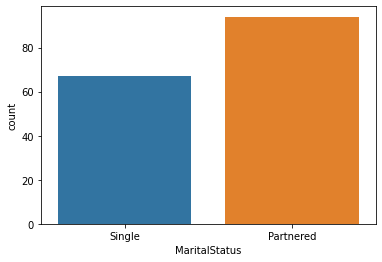

In [40]:
sns.countplot(x = 'MaritalStatus', data = df)

> people with partners tend to purchase more

<AxesSubplot:xlabel='Product,MaritalStatus', ylabel='Count'>

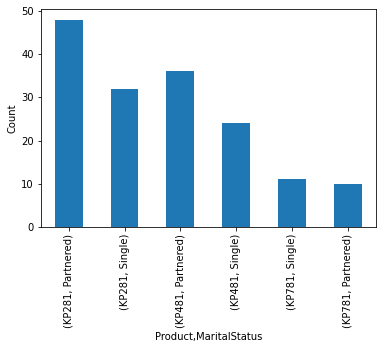

In [41]:
df.groupby('Product')['MaritalStatus'].value_counts().plot(kind = 'bar', ylabel = 'Count')


> Most partnered people tend to purchase the cheaper version, while the advanced version is slightly more preferred by single consumers 

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

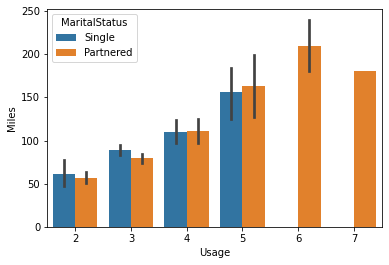

In [42]:
sns.barplot(x = 'Usage', y = 'Miles', hue = 'MaritalStatus', data = df)

> We can see increased usage patterns for partnered consumers 

<b>Inference:<i> We can see that Partnered consumers are more likely to use the treadmill more frequently, but are not comfortable spending more for advanced features and hence prefer to buy the basic entry level and mid level versions.

<AxesSubplot:xlabel='Product', ylabel='count'>

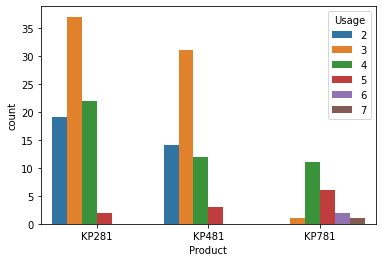

In [43]:
sns.countplot(x = 'Product', hue = 'Usage', data = df)

> Consumers purchasing the advanced level treadmill uses them more frequently

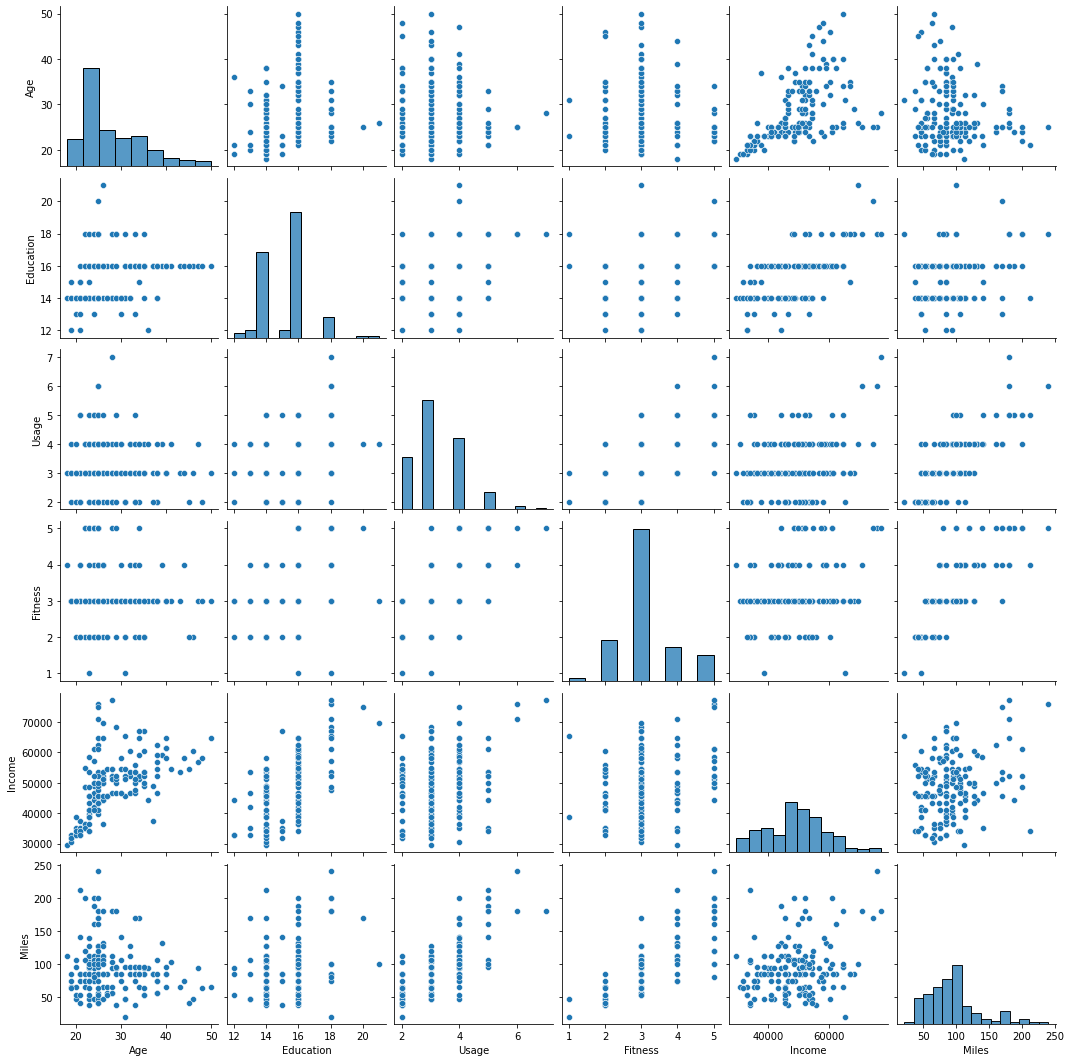

In [44]:
sns.pairplot(df)

  ## 4.<u>Probability

### Marginal Probability

In [45]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True, normalize = True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,24.844720,18.012422,2.484472,45.341615
Male,24.844720,19.254658,10.559006,54.658385
All,49.689441,37.267081,13.043478,100.000000


> <i>   Out of 45% females and 54% males:</i><br><li>24% of males and females have purchased KP281<br><li>18-19% of males and females have purchased KP781<br><li>10% of males and just 2% of females have purchased KP781

In [46]:
pd.crosstab(index=df['income_bins'],columns=df['Product'],margins=True, normalize = True)*100

Product,KP281,KP481,KP781,All
income_bins,,,,
29k-40k,14.285714,5.590062,0.000000,19.875776
40k-50k,15.527950,13.043478,3.105590,31.677019
50k-60k,16.149068,14.285714,3.726708,34.161491
60k-70k,3.726708,4.347826,3.726708,11.801242
70k-80k,0.000000,0.000000,2.484472,2.484472
All,49.689441,37.267081,13.043478,100.000000


><li>Consumers in the income range 40k-60k have purchased the most amount of treadmills

In [47]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True, normalize = True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,29.813665,22.360248,6.211180,58.385093
Single,19.875776,14.906832,6.832298,41.614907
All,49.689441,37.267081,13.043478,100.000000


><li>Partnered consumers have the highest amount of purchase and they mostly prefer the entry level model

### Conditional Probability

Checking conditional probability of key indicators

<b><u>Product vs Age

In [48]:
df.groupby(['Product'])['age_bins'].value_counts()/df.groupby('Product')['age_bins'].count()*100

Product        
KP281    20-30      61.250000
         30-40      23.750000
         0-20        7.500000
         40-50       7.500000
         50-70       0.000000
         70-100      0.000000
KP481    20-30      51.666667
         30-40      38.333333
         0-20        6.666667
         40-50       3.333333
         50-70       0.000000
         70-100      0.000000
KP781    20-30     100.000000
         0-20        0.000000
         30-40       0.000000
         40-50       0.000000
         50-70       0.000000
         70-100      0.000000
Name: age_bins, dtype: float64

> <li>The probability of a purchase is very high if the consumer is between age 20-30, and sees a steady decline after 40<br><li>Advanced models are only purchased by consumers between age 20 and 30<br><li>No purchases are made by consumers above age 50

<b><u>Product vs Income

<tt><font size = 4><font color =  blue>PRODUCT 1 : <b>KP281

In [49]:
df[df.Product == 'KP281'].groupby(['Product'])['income_bins'].value_counts()/df.groupby('Product')['income_bins'].count()*100

Product         
KP281    50k-60k    32.50
         40k-50k    31.25
         29k-40k    28.75
         60k-70k     7.50
         70k-80k     0.00
Name: income_bins, dtype: float64

<tt><font color = gray>32% of consumers between 50k-60k,31% of consumers between 40k-50k and 28% of consumers between 29k-40k have purchased KP281

><li>This seems to be considered as the best value product as probability of purchase is high for consumers with income between 29k and 60k<li>However people with higher income seems to mostly avoid the low end model 

<tt><font size = 4><font color =  blue>PRODUCT 2 : <b>KP481

In [50]:
df[df.Product == 'KP481'].groupby(['Product'])['income_bins'].value_counts()/df.groupby('Product')['income_bins'].count()*100

Product         
KP481    50k-60k    38.333333
         40k-50k    35.000000
         29k-40k    15.000000
         60k-70k    11.666667
         70k-80k     0.000000
Name: income_bins, dtype: float64

<tt><font color = gray>38% of consumers between 50k-60k,35% of consumers between 40k-50k and 15% of consumers between 29k-40k have purchased KP481

><li>Probability of purchase is  high for consumers with income between 40k and 60k<li>This mid level product is preferred by mid tier consumers, but the top tier consumers do not seem to prefer this

<tt><font size = 4><font color =  blue>PRODUCT 3 : <b>KP781

In [51]:
df[df.Product == 'KP781'].groupby(['Product'])['income_bins'].value_counts()/df.groupby('Product')['income_bins'].count()*100

Product         
KP781    50k-60k    28.571429
         60k-70k    28.571429
         40k-50k    23.809524
         70k-80k    19.047619
         29k-40k     0.000000
Name: income_bins, dtype: float64

<tt><font color = gray>28% of consumers between 50k-60k,28% of consumers between 60k-70k and 23% of consumers between 40k-50k have purchased KP781

><li>Probability of purchase of this advanced version is high for the consumers between the income range 50k to 70k<li>Definetly not preferrend by low income consumers

<b><u>Product vs Marital Status

In [52]:
df.groupby(['Product'])['MaritalStatus'].value_counts()/df.groupby('Product')['MaritalStatus'].count()*100

Product  MaritalStatus
KP281    Partnered        60.000000
         Single           40.000000
KP481    Partnered        60.000000
         Single           40.000000
KP781    Single           52.380952
         Partnered        47.619048
Name: MaritalStatus, dtype: float64

><li>Clearly evident that the probability of a consumer is the highest when he/she is not single

<b><u>Product vs Fitness Rating

In [53]:
df.groupby(['Product'])['Fitness'].value_counts()/df.groupby('Product')['Fitness'].count()*100

Product  Fitness
KP281    3          67.500000
         2          17.500000
         4          11.250000
         5           2.500000
         1           1.250000
KP481    3          65.000000
         2          20.000000
         4          13.333333
         1           1.666667
KP781    5          66.666667
         4          19.047619
         3          14.285714
Name: Fitness, dtype: float64

><li>People who have higher fitness rating and think they are adequately fit has a higher probabaility on purchasing the advanced model<li>People who think they have an average level of fitness tend to start with the entry level or mid level model

  ## 5.<u>Customer Profiling

Based on all the analysis done above, we can categorize the consumers to 3 key profiles:

1. <b>High income, young and educated consumers:</b><br>    Highest chance of a purchase, especially the advanced model
    
    
2. <b>Partnered Consumers</b><br>    Probability of a purchase shoots up as a person gets a partner


3. <b>Entry level consumers</b><br>    Majority of the consumers fall in this category. Thier fitness rating is around 3 to 4 and they often prefer the entry level model

  ## 6.<u>Recommendations

<li>Obtaining a fitness rating from a customer through a survey can help identify the model that they would most likely purchase. Higher the fitness rating the higher they might spend.<br><br>


<li>Introducing a new model that sits between the mid level and advanced level model could attract a lot of consumers. The advanced model can be pitched to consumers between age 20-30, and that can be used as an anchor to sell this newly introduced model. <br><br>

<li> Special offers or coupons can be provided to partnered consumers in order to upsell the mid level and advanced level models. A referal bonus could also boost sales among this category of consumers.<br><br>

<li>Discounts for females on the advanced models.<br><br>
    
<li>Entry level consumers can be given discounts to motivate them to upgrade to a newer model.
